# 环境介绍

conda版本：https://mirrors.tuna.tsinghua.edu.cn/anaconda/archive/Anaconda3-2021.11-Windows-x86_64.exe


# 数据库介绍

菜鸟教程：https://www.runoob.com/mysql/mysql-tutorial.html  

## 连接器创建

先手动创建数据库和数据表

In [33]:
# 导入pymysql模块
import pymysql

In [34]:
# 连接database
conn = pymysql.connect(host='127.0.0.1', port=3306, user='root', password='biliafan'
                       ,database='test', charset='utf8')

# 得到一个可以执行SQL语句的光标对象
# cursor = conn.cursor()

# 得到一个可以执行SQL语句并且将结果作为字典返回的游标
cursor = conn.cursor(cursor=pymysql.cursors.DictCursor)

## SQL执行基操

### 查询表

In [18]:
sql = "show tables"
cursor.execute(sql)

1

### 查询类的fetchall

#### 查询后必须用个变量存下来

In [12]:
cursor.fetchall()

[{'Tables_in_test': 'newtable'}]

In [13]:
cursor.fetchall()

[]

#### Python特殊的 _ 变量

In [24]:
sql = "show tables"
cursor.execute(sql)
cursor.fetchall()

[{'Tables_in_test': 'newtable'}]

In [25]:
_

[{'Tables_in_test': 'newtable'}]

### 事务类commit

举例：转账问题，你这边扣款成功，但是那边账号不对，所以扣款和余额增加是一步操作

增删改 - 都是事务操作，引发行级锁

## 创建表

通常每张表都会有一个字段或者多个字段联合起来唯一标识表记录，这样的字段成为这张表的主键，我们可以为这样的字段增加主键约束，**主键约束要求字段必须不能为空且值必须唯一**


- 定义主键约束:PRIMARY KEY
- 定义唯一约束：unique
- 定义非空约束：not null

注意：
- 1 建表，一定要慎重，要和业务逻辑和技术要求相符合
- 2 不要和mysql关键字重合

In [35]:
# 定义要执行的SQL语句
sql = """
CREATE TABLE USER (
id INT auto_increment PRIMARY KEY, 
name VARCHAR(10) NOT NULL UNIQUE,
pwd VARCHAR(16) NOT NULL,
date TIMESTAMP
)ENGINE=innodb DEFAULT CHARSET=utf8;
"""

In [ ]:
# 执行SQL语句
cursor.execute(sql)

## 关闭连接

操作完主动关闭连接，减少资源消耗

In [197]:
# 关闭光标对象
cursor.close()

# 关闭数据库连接
conn.close()

## 增删改查训练

### 增

In [37]:
import datetime

In [42]:
sql = "INSERT INTO USER(name, pwd, date) VALUES (%s, %s, %s);"

In [40]:
username = "Frank"
pwd = 123456
date = datetime.datetime.now().strftime("%Y-%m-%d %H:%M:%S")  

In [43]:
# 执行SQL语句
cursor.execute(sql, [username, pwd, date])

1

In [44]:
# 提交事务
conn.commit()

### 查

In [45]:
# 编写sql 查询语句  user 对应我的表名  
sql = "select * from USER"  

In [46]:
cursor.execute(sql)

1

In [47]:
cursor.fetchall()

[{'id': 1,
  'name': 'Frank',
  'pwd': '123456',
  'date': datetime.datetime(2023, 2, 2, 0, 28, 21)}]

In [48]:
results = _

In [49]:
import pandas as pd

In [50]:
pd.DataFrame(results)

,id,name,pwd,date
0,1,Frank,123456,2023-02-02 00:28:21


### 改

In [51]:
# 修改数据的SQL语句
sql = "UPDATE USER SET pwd=%s WHERE name=%s;"
username = "Frank"
newpwd = 654321

In [52]:
try:
    # 执行SQL语句
    cursor.execute(sql, [newpwd, username])
    # 提交事务
    conn.commit()
except Exception as e:
    print(e)
    # 有异常，回滚事务
    conn.rollback()

### 删

如果用户不再使用了，需要把TA的记录给删除

注：真实业务场景中，任何业务数据都是有价值的

In [53]:
sql = "DELETE FROM USER WHERE name=%s;"
try:
    cursor.execute(sql, ['Frank'])
    # 提交事务
    conn.commit()
except Exception as e:
    # 有异常，回滚事务
    conn.rollback()

## 进阶操作

### 操作回滚

In [54]:
sql = "INSERT INTO USER(name, pwd, date) VALUES (%s, %s, %s);"

In [55]:
username = "kangkang"
pwd = 123456
date = datetime.datetime.now().strftime("%Y-%m-%d %H:%M:%S")  

In [56]:
try:
    # 执行SQL语句
    cursor.execute(sql, [username, pwd, date])
    # 这一句会报错
    cursor.execute(sql, [username, pwd, date])
    # 提交事务
    conn.commit()
except Exception as e:
    print(e)
    # 有异常，回滚事务
    conn.rollback()

(1062, "Duplicate entry 'kangkang' for key 'user.name'")


### 批量执行

In [57]:
sql = "INSERT INTO USER(name, pwd, date) VALUES (%s, %s, %s);"
data = [("Frank", 18, datetime.datetime.now().strftime("%Y-%m-%d %H:%M:%S")  )
        , ("DIDI", 20, datetime.datetime.now().strftime("%Y-%m-%d %H:%M:%S")  )
        , ("HAHA", 21, datetime.datetime.now().strftime("%Y-%m-%d %H:%M:%S")  )]

In [58]:
try:
    # 批量执行多条插入SQL语句
    cursor.executemany(sql, data)
    # 提交事务
    conn.commit()
except Exception as e:
    print(e)
    # 有异常，回滚事务
    conn.rollback()

In [59]:
# 编写sql 查询语句  user 对应我的表名  
sql = "select * from USER"  
cursor.execute(sql)
cursor.fetchall()

[{'id': 4,
  'name': 'Frank',
  'pwd': '18',
  'date': datetime.datetime(2023, 2, 2, 0, 44, 50)},
 {'id': 5,
  'name': 'DIDI',
  'pwd': '20',
  'date': datetime.datetime(2023, 2, 2, 0, 44, 50)},
 {'id': 6,
  'name': 'HAHA',
  'pwd': '21',
  'date': datetime.datetime(2023, 2, 2, 0, 44, 50)}]

# AKSHARE行情数据存储

In [60]:
import akshare as ak

## 获取所有股票的列表

缺点体现：没有一个接口同时获取所有股票信息，股票缺少行业的等字段，接口不统一（没有进行多源重构）

In [61]:
stock_df = ak.stock_zh_a_spot_em() 

In [62]:
stock_df

,序号,代码,名称,最新价,涨跌幅,涨跌额,成交量,成交额,振幅,最高,...,量比,换手率,市盈率-动态,市净率,总市值,流通市值,涨速,5分钟涨跌,60日涨跌幅,年初至今涨跌幅
0,1,601059,N信达,11.88,44.00,3.63,77071.0,9.116085e+07,24.00,11.88,...,NaN,2.38,39.92,2.44,3.852684e+10,3.852684e+09,0.00,0.00,44.00,44.00
1,2,831526,凯华材料,7.28,27.27,1.56,119716.0,8.369095e+07,26.75,7.43,...,5.06,56.79,35.67,3.32,6.020560e+08,1.534629e+08,0.14,0.28,12.00,76.70
2,3,300309,*ST吉艾,1.01,20.24,0.17,1820609.0,1.773054e+08,17.86,1.01,...,1.67,21.74,-1.75,-0.76,8.949850e+08,8.457909e+08,0.00,0.00,-28.87,-29.37
3,4,300044,赛为智能,5.45,20.04,0.91,2910558.0,1.490658e+09,16.52,5.45,...,3.60,43.49,-104.37,4.18,4.197379e+09,3.647135e+09,0.00,0.00,61.24,92.58
4,5,300084,海默科技,6.05,20.04,1.01,565386.0,3.226772e+08,19.64,6.05,...,7.28,17.15,-38.70,2.36,2.327833e+09,1.995001e+09,0.00,0.00,44.39,37.19
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5274,5275,002848,高斯贝尔,12.32,-5.95,-0.78,505767.0,6.106837e+08,5.11,12.46,...,1.53,31.46,52.09,8.04,2.059288e+09,1.980763e+09,0.08,0.33,18.23,32.76
5275,5276,300763,锦浪科技,171.35,-6.42,-11.76,104692.0,1.809343e+09,8.35,183.50,...,2.60,3.49,68.92,16.62,6.463124e+10,5.140664e+10,0.02,0.05,-9.23,-4.83
5276,5277,001236,弘业期货,20.19,-6.74,-1.46,540560.0,1.091288e+09,8.87,21.43,...,1.22,53.64,529.20,10.92,2.034703e+10,2.034703e+09,-0.10,-1.03,-2.51,49.33
5277,5278,833523,德瑞锂电,14.87,-7.18,-1.15,37249.0,5.628414e+07,11.11,16.18,...,2.70,7.91,26.40,3.01,1.158732e+09,7.003969e+08,0.00,-0.13,13.51,24.96


In [63]:
stock_df.columns

Index(['序号', '代码', '名称', '最新价', '涨跌幅', '涨跌额', '成交量', '成交额', '振幅', '最高', '最低',
       '今开', '昨收', '量比', '换手率', '市盈率-动态', '市净率', '总市值', '流通市值', '涨速', '5分钟涨跌',
       '60日涨跌幅', '年初至今涨跌幅'],
      dtype='object')

## 获取所有股票历史行情

### 股票复权原理

很用心官网做了解释：https://www.akshare.xyz/data/stock/stock.html#id19

[其他参考](https://mp.weixin.qq.com/s?__biz=MzUxMjU4NDAwNA==&mid=2247484072&idx=1&sn=501e720447b6cf1b5544795e8f226a8d)

股票数据复权

1.为何要复权：由于股票存在配股、分拆、合并和发放股息等事件，会导致股价出现较大的缺口。 若使用不复权的价格处理数据、计算各种指标，将会导致它们失去连续性，且使用不复权价格计算收益也会出现错误。 为了保证数据连贯性，常通过前复权和后复权对价格序列进行调整。

2.前复权：保持当前价格不变，将历史价格进行增减，从而使股价连续。 前复权用来看盘非常方便，能一眼看出股价的历史走势，叠加各种技术指标也比较顺畅，是各种行情软件默认的复权方式。 这种方法虽然很常见，但也有两个缺陷需要注意。

2.1 为了保证当前价格不变，每次股票除权除息，均需要重新调整历史价格，因此其历史价格是时变的。 这会导致在不同时点看到的历史前复权价可能出现差异。

2.2 对于有持续分红的公司来说，前复权价可能出现负值。

3.后复权：保证历史价格不变，在每次股票权益事件发生后，调整当前的股票价格。 后复权价格和真实股票价格可能差别较大，不适合用来看盘。 其优点在于，可以被看作投资者的长期财富增长曲线，反映投资者的真实收益率情况。

4.在量化投资研究中普遍采用后复权数据。

以中信证券为例：https://data.eastmoney.com/yjfp/detail/600030.html

In [70]:
hfq = ak.stock_zh_a_hist(symbol="600030", period="daily", start_date="20000101", end_date='20230201'
                   , adjust="hfq")

In [71]:
qfq = ak.stock_zh_a_hist(symbol="600030", period="daily", start_date="20000101", end_date='20230201'
                   , adjust="qfq")

In [72]:
bfq = ak.stock_zh_a_hist(symbol="600030", period="daily", start_date="20000101", end_date='20230201'
                   , adjust="")

In [73]:
import matplotlib.pyplot as plt

In [74]:
bfq.iloc[1225:, ].head(10)

,日期,开盘,收盘,最高,最低,成交量,成交额,振幅,涨跌幅,涨跌额,换手率
1225,2008-04-22,53.75,56.19,56.38,51.50,372972,1.997202e+09,8.87,2.15,1.18,1.34
1226,2008-04-23,55.68,58.92,59.80,55.00,728468,4.245771e+09,8.54,4.86,2.73,2.61
1227,2008-04-24,32.13,32.13,32.13,32.13,144058,4.628576e+08,0.00,-45.47,-26.79,0.26
1228,2008-04-25,35.34,35.34,35.34,34.50,3762451,1.327501e+10,2.61,9.99,3.21,6.74
1229,2008-04-28,35.00,35.12,36.25,34.61,2920598,1.043327e+10,4.64,-0.62,-0.22,5.23
1230,2008-04-29,34.50,36.84,36.88,34.30,2072000,7.417317e+09,7.35,4.90,1.72,3.71
1231,2008-04-30,36.90,39.64,40.08,36.54,2596786,1.008130e+10,9.61,7.60,2.80,4.65
1232,2008-05-05,40.50,40.13,40.64,39.10,2131515,8.523442e+09,3.88,1.24,0.49,3.82
1233,2008-05-06,39.21,40.82,43.00,38.43,2844210,1.149187e+10,11.39,1.72,0.69,5.09
1234,2008-05-07,39.70,37.78,40.91,37.66,1935407,7.631245e+09,7.96,-7.45,-3.04,3.47


In [76]:
hfq.iloc[1225:, ].head(10)

,日期,开盘,收盘,最高,最低,成交量,成交额,振幅,涨跌幅,涨跌额,换手率
1225,2008-04-22,54.23,56.67,56.86,51.98,372972,1.997202e+09,8.79,2.13,1.18,1.34
1226,2008-04-23,56.16,59.40,60.28,55.48,728468,4.245771e+09,8.47,4.82,2.73,2.61
1227,2008-04-24,65.24,65.24,65.24,65.24,144058,4.628576e+08,0.00,9.83,5.84,0.26
1228,2008-04-25,71.66,71.66,71.66,69.98,3762451,1.327501e+10,2.58,9.84,6.42,6.74
1229,2008-04-28,70.98,71.22,73.48,70.20,2920598,1.043327e+10,4.58,-0.61,-0.44,5.23
1230,2008-04-29,69.98,74.66,74.74,69.58,2072000,7.417317e+09,7.25,4.83,3.44,3.71
1231,2008-04-30,74.78,80.26,81.14,74.06,2596786,1.008130e+10,9.48,7.50,5.60,4.65
1232,2008-05-05,81.98,81.24,82.26,79.18,2131515,8.523442e+09,3.84,1.22,0.98,3.82
1233,2008-05-06,79.40,82.62,86.98,77.84,2844210,1.149187e+10,11.25,1.70,1.38,5.09
1234,2008-05-07,80.38,76.54,82.80,76.30,1935407,7.631245e+09,7.87,-7.36,-6.08,3.47


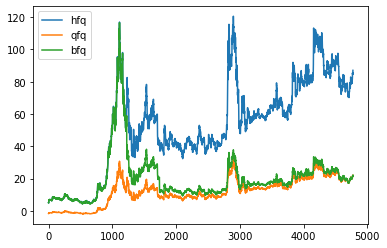

In [75]:
plt.plot(hfq['收盘'], color='C0', label='hfq')
plt.plot(qfq['收盘'], color='C1', label='qfq')
plt.plot(bfq['收盘'], color='C2', label='bfq')
plt.legend()

### 获取后复权

In [77]:
stock_zh_a_hist_df = ak.stock_zh_a_hist(symbol="000001", period="daily", start_date="20170101", end_date='20210907', adjust="hfq")

In [78]:
stock_zh_a_hist_df

,日期,开盘,收盘,最高,最低,成交量,成交额,振幅,涨跌幅,涨跌额,换手率
0,2017-01-03,1513.44,1521.56,1524.82,1510.19,459840,4.205952e+08,0.97,0.64,9.75,0.31
1,2017-01-04,1519.94,1521.56,1524.82,1518.31,449330,4.115034e+08,0.43,0.00,0.00,0.31
2,2017-01-05,1523.19,1523.19,1524.82,1519.94,344373,3.157697e+08,0.32,0.11,1.63,0.24
3,2017-01-06,1523.19,1516.69,1523.19,1513.44,358154,3.271764e+08,0.64,-0.43,-6.50,0.24
4,2017-01-09,1516.69,1519.94,1523.19,1513.44,361082,3.299946e+08,0.64,0.21,3.25,0.21
...,...,...,...,...,...,...,...,...,...,...,...
1136,2021-09-01,3009.83,3074.84,3081.34,2933.44,2316894,4.046284e+09,4.83,0.42,13.00,1.19
1137,2021-09-02,3094.34,3159.35,3221.11,3061.84,2422604,4.454545e+09,5.18,2.75,84.51,1.25
1138,2021-09-03,3175.61,3100.84,3175.61,3045.58,1394819,2.523273e+09,4.12,-1.85,-58.51,0.72
1139,2021-09-06,3082.97,3167.48,3191.86,3058.59,1515226,2.780281e+09,4.30,2.15,66.64,0.78


### 循环获取

In [82]:
total_stock_list = stock_df['代码'].tolist()
total_stock_list = total_stock_list[:1000]

In [83]:
len(total_stock_list)

1000

In [84]:
stock_hist_dict = {}

In [85]:
start_date  = '20170101'
end_date = '20230131'
adjust = 'hfq'

In [86]:
import time
start_time = time.time()
# 每次从未获取成功的股票循环获取，而不是每次都重新开始
pending_stock_list = list(set(total_stock_list) - set(stock_hist_dict))

for num, stock_id in enumerate(pending_stock_list):
    if num % 50 == 0:
        print(f'has got {num} stock data, achieve {num/len(pending_stock_list)}, cost {time.time()-start_time}')
    tmp_df = ak.stock_zh_a_hist(symbol=stock_id, period="daily", start_date=start_date, end_date=end_date, adjust=adjust)
    stock_hist_dict[stock_id] = tmp_df

has got 0 stock data, achieve 0.0, cost 0.001980304718017578
has got 50 stock data, achieve 0.05, cost 4.331678628921509
has got 100 stock data, achieve 0.1, cost 9.118650436401367
has got 150 stock data, achieve 0.15, cost 13.207457065582275
has got 200 stock data, achieve 0.2, cost 17.933401584625244
has got 250 stock data, achieve 0.25, cost 23.21298384666443
has got 300 stock data, achieve 0.3, cost 29.508180856704712
has got 350 stock data, achieve 0.35, cost 34.820443630218506
has got 400 stock data, achieve 0.4, cost 41.359251737594604
has got 450 stock data, achieve 0.45, cost 45.60285711288452
has got 500 stock data, achieve 0.5, cost 50.150957107543945
has got 550 stock data, achieve 0.55, cost 54.51493191719055
has got 600 stock data, achieve 0.6, cost 57.94046115875244
has got 650 stock data, achieve 0.65, cost 61.853256940841675
has got 700 stock data, achieve 0.7, cost 65.95582127571106
has got 750 stock data, achieve 0.75, cost 69.87637305259705
has got 800 stock data, a

### 数据拼接

In [90]:
import pandas as pd
total_hist_df = pd.DataFrame()

In [91]:
for k, v in stock_hist_dict.items():
    tmp_df = v
    tmp_df['股票代码'] = k
    total_hist_df = pd.concat([total_hist_df, tmp_df], axis=0)

In [92]:
total_hist_df

,日期,开盘,收盘,最高,最低,成交量,成交额,振幅,涨跌幅,涨跌额,换手率,股票代码
0,2020-02-11,70.00,85.00,113.00,69.99,138004.0,1.224828e+09,178.32,252.40,60.88,75.82,688398
1,2020-02-12,76.00,83.88,84.01,71.01,83962.0,6.409996e+08,15.29,-1.32,-1.12,46.13,688398
2,2020-02-13,79.00,75.80,79.55,74.47,61740.0,4.753326e+08,6.06,-9.63,-8.08,33.92,688398
3,2020-02-14,73.30,74.98,78.82,71.57,42036.0,3.156774e+08,9.56,-1.08,-0.82,23.10,688398
4,2020-02-17,73.95,76.53,79.52,73.17,51267.0,3.902146e+08,8.47,2.07,1.55,28.17,688398
...,...,...,...,...,...,...,...,...,...,...,...,...
1458,2023-01-18,129.60,131.08,131.89,128.65,153876.0,2.906024e+08,2.51,1.46,1.89,3.71,300075
1459,2023-01-19,130.61,133.44,133.92,130.20,246781.0,4.740522e+08,2.84,1.80,2.36,5.94,300075
1460,2023-01-20,133.44,134.46,135.81,132.09,249711.0,4.847733e+08,2.79,0.76,1.02,6.01,300075
1461,2023-01-30,137.63,135.20,138.30,134.73,281305.0,5.534254e+08,2.66,0.55,0.74,6.78,300075


## 准备将数据存入数据库

In [ ]:
# 连接database
conn = pymysql.connect(host='127.0.0.1',port=3306, user='root',password='biliafan'
                       ,database='test'
                       ,charset='utf8')
# 得到一个可以执行SQL语句并且将结果作为字典返回的游标
cursor = conn.cursor(cursor=pymysql.cursors.DictCursor)

### 创建数据表

分成2个表来存，因为数据粒度不同会带来很多问题，比如股票改名字了，此时就要去行情数据修改这些信息

数据库规范化 - 六大范式解析：https://blog.csdn.net/weixin_48581386/article/details/125116744

#### 股票信息数据表

In [156]:
# 定义要执行的SQL语句
sql = """
CREATE TABLE stock_info (
id INT auto_increment PRIMARY KEY ,
date TIMESTAMP,
code CHAR(6) NOT NULL,
name VARCHAR(10)
)ENGINE=innodb DEFAULT CHARSET=utf8;
"""
# 先删除表
cursor.execute("drop table if exists stock_info")
# 执行SQL语句
cursor.execute(sql)

0

#### 股票行情数据表

In [155]:
# 定义要执行的SQL语句
sql = """
CREATE TABLE stock_daybar (
id INT auto_increment PRIMARY KEY ,
date TIMESTAMP,
code CHAR(6) NOT NULL,
open FLOAT,
high FLOAT,
low FLOAT,
close FLOAT,
volume FLOAT,
turnover FLOAT
)ENGINE=innodb DEFAULT CHARSET=utf8;
"""
# 先删除表
cursor.execute("drop table if exists stock_daybar")
# 执行SQL语句
cursor.execute(sql)

0

### 数据插入

#### 信息数据表插入

In [158]:
info_sql = "INSERT INTO stock_info(date, code, name) VALUES (%s, %s, %s);"

In [160]:
info_df = stock_df.loc[:, ['代码', '名称']]
info_df['日期'] = end_date
# 调整顺序的必要性
info_df = info_df.loc[:, ['日期', '代码', '名称']]

In [161]:
try:
    # 批量执行多条插入SQL语句
    cursor.executemany(info_sql, info_df.values.tolist())
    # 提交事务
    conn.commit()
except Exception as e:
    print(e)
    # 有异常，回滚事务
    conn.rollback()

#### 行情数据表插入

In [163]:
# 定义要执行的SQL语句
sql = """
CREATE TABLE stock_daybar (
id INT auto_increment PRIMARY KEY ,
date TIMESTAMP,
code CHAR(6) NOT NULL,
open FLOAT,
high FLOAT,
low FLOAT,
close FLOAT,
volume FLOAT,
turnover FLOAT
)ENGINE=innodb DEFAULT CHARSET=utf8;
"""
# 先删除表
cursor.execute("drop table if exists stock_daybar")
# 执行SQL语句
cursor.execute(sql)

0

In [164]:
daybar_sql = "INSERT INTO stock_daybar(date, code, open, high, low, close, volume, turnover) "\
             "VALUES (%s, %s, %s, %s, %s, %s, %s, %s);"

In [165]:
daybar_df = total_hist_df.loc[:, ['日期', '股票代码', '开盘', '最高', '最低', '收盘', '成交量', '成交额']]

In [167]:
%%time
try:
    # 批量执行多条插入SQL语句
    cursor.executemany(daybar_sql, daybar_df.values.tolist())
    # 提交事务
    conn.commit()
except Exception as e:
    print(e)
    # 有异常，回滚事务
    conn.rollback()

Wall time: 1min 3s


#### 注意事项

np.nan

In [193]:
sql = "select count(*) from stock_daybar"  

In [194]:
%%time
cursor.execute(sql)
results = cursor.fetchall()
results

Wall time: 76.8 ms


[{'count(*)': 1073955}]

### 数据查询

pandas+pymyql使用原则：先用sql进行必要的筛选过滤，再用pandas处理，如果数据量不大，直接全量读取

#### 全量行情查询

In [170]:
sql = "select * from stock_daybar"  

In [171]:
%%time
cursor.execute(sql)
results = cursor.fetchall()
daybar_df = pd.DataFrame(results)
daybar_df

Wall time: 52.2 s


,id,date,code,open,high,low,close,volume,turnover
0,1,2020-02-11,688398,70.00,113.00,69.99,85.00,138004.0,1.224830e+09
1,2,2020-02-12,688398,76.00,84.01,71.01,83.88,83962.0,6.410000e+08
2,3,2020-02-13,688398,79.00,79.55,74.47,75.80,61740.0,4.753330e+08
3,4,2020-02-14,688398,73.30,78.82,71.57,74.98,42036.0,3.156770e+08
4,5,2020-02-17,688398,73.95,79.52,73.17,76.53,51267.0,3.902150e+08
...,...,...,...,...,...,...,...,...,...
1072950,1072951,2023-01-18,300075,129.60,131.89,128.65,131.08,153876.0,2.906020e+08
1072951,1072952,2023-01-19,300075,130.61,133.92,130.20,133.44,246781.0,4.740520e+08
1072952,1072953,2023-01-20,300075,133.44,135.81,132.09,134.46,249711.0,4.847730e+08
1072953,1072954,2023-01-30,300075,137.63,138.30,134.73,135.20,281305.0,5.534250e+08


#### 指定字段查询

In [172]:
sql = "select date, code, close from stock_daybar"  

In [173]:
%%time
cursor.execute(sql)
results = cursor.fetchall()
daybar_df = pd.DataFrame(results)
daybar_df

Wall time: 38.7 s


,date,code,close
0,2020-02-11,688398,85.00
1,2020-02-12,688398,83.88
2,2020-02-13,688398,75.80
3,2020-02-14,688398,74.98
4,2020-02-17,688398,76.53
...,...,...,...
1072950,2023-01-18,300075,131.08
1072951,2023-01-19,300075,133.44
1072952,2023-01-20,300075,134.46
1072953,2023-01-30,300075,135.20


#### 个股行情查询

In [195]:
sql = "select * from stock_daybar where code = '688398'"  

In [196]:
%%time
cursor.execute(sql)
results = cursor.fetchall()
daybar_df = pd.DataFrame(results)
daybar_df

Wall time: 673 ms


,id,date,code,open,high,low,close,volume,turnover
0,1,2020-02-11,688398,70.00,113.00,69.99,85.00,138004.0,1.224830e+09
1,2,2020-02-12,688398,76.00,84.01,71.01,83.88,83962.0,6.410000e+08
2,3,2020-02-13,688398,79.00,79.55,74.47,75.80,61740.0,4.753330e+08
3,4,2020-02-14,688398,73.30,78.82,71.57,74.98,42036.0,3.156770e+08
4,5,2020-02-17,688398,73.95,79.52,73.17,76.53,51267.0,3.902150e+08
...,...,...,...,...,...,...,...,...,...
718,719,2023-01-19,688398,39.19,41.50,38.89,41.04,9576.0,3.783160e+07
719,720,2023-01-20,688398,40.84,41.31,39.91,40.59,4188.0,1.642230e+07
720,721,2023-01-30,688398,40.59,40.96,39.80,40.58,6124.0,2.400520e+07
721,722,2023-01-31,688398,40.19,41.61,39.91,40.69,6712.0,2.654510e+07


#### 指定时间查询

In [176]:
sql = "select * from stock_daybar where date between '2020-01-01' and '2020-02-01'"  

In [177]:
%%time
cursor.execute(sql)
results = cursor.fetchall()
daybar_df = pd.DataFrame(results)
daybar_df

Wall time: 2 s


,id,date,code,open,high,low,close,volume,turnover
0,2025,2020-01-02,600409,28.61,29.55,28.54,28.99,486187.0,313590000.0
1,2026,2020-01-03,600409,28.91,29.02,28.61,28.69,210796.0,134119000.0
2,2027,2020-01-06,600409,28.46,29.21,28.16,28.39,432338.0,273431000.0
3,2028,2020-01-07,600409,28.54,28.69,28.12,28.50,215351.0,135055000.0
4,2029,2020-01-08,600409,28.50,28.50,27.64,27.90,341186.0,209613000.0
...,...,...,...,...,...,...,...,...,...
11150,1072223,2020-01-17,300075,87.58,92.10,86.36,88.39,329839.0,422398000.0
11151,1072224,2020-01-20,300075,88.05,93.58,86.97,91.83,267441.0,349708000.0
11152,1072225,2020-01-21,300075,90.88,91.90,88.52,88.52,172002.0,221394000.0
11153,1072226,2020-01-22,300075,87.58,88.05,84.47,87.04,166022.0,206107000.0


#### 多个股票查询

In [180]:
sql = "select * from stock_daybar where code in ('300075', '600409') and date between '2020-01-01' and '2020-02-01'"  

In [181]:
%%time
cursor.execute(sql)
results = cursor.fetchall()
daybar_df = pd.DataFrame(results)
daybar_df

Wall time: 671 ms


,id,date,code,open,high,low,close,volume,turnover
0,2025,2020-01-02,600409,28.61,29.55,28.54,28.99,486187.0,313590000.0
1,2026,2020-01-03,600409,28.91,29.02,28.61,28.69,210796.0,134119000.0
2,2027,2020-01-06,600409,28.46,29.21,28.16,28.39,432338.0,273431000.0
3,2028,2020-01-07,600409,28.54,28.69,28.12,28.50,215351.0,135055000.0
4,2029,2020-01-08,600409,28.50,28.50,27.64,27.90,341186.0,209613000.0
5,2030,2020-01-09,600409,28.09,28.31,27.94,28.09,195873.0,121020000.0
6,2031,2020-01-10,600409,28.20,28.69,28.12,28.46,256416.0,160497000.0
7,2032,2020-01-13,600409,28.46,28.50,28.01,28.42,201148.0,125006000.0
8,2033,2020-01-14,600409,28.42,28.72,28.20,28.39,203376.0,127459000.0
9,2034,2020-01-15,600409,28.39,29.29,28.20,29.21,357703.0,227412000.0


### 增量更新

#### 只演示行情更新

In [183]:
len(total_stock_list)

1000

In [184]:
stock_hist_dict = {}

In [185]:
start_date  = '20230201'
end_date = '20230201'
adjust = 'hfq'

In [186]:
import time
start_time = time.time()
# 每次从未获取成功的股票循环获取，而不是每次都重新开始
pending_stock_list = list(set(total_stock_list) - set(stock_hist_dict))

for num, stock_id in enumerate(pending_stock_list):
    if num % 50 == 0:
        print(f'has got {num} stock data, achieve {num/len(pending_stock_list)}, cost {time.time()-start_time}')
    tmp_df = ak.stock_zh_a_hist(symbol=stock_id, period="daily", start_date=start_date, end_date=end_date, adjust=adjust)
    stock_hist_dict[stock_id] = tmp_df

has got 0 stock data, achieve 0.0, cost 0.002952098846435547
has got 50 stock data, achieve 0.05, cost 1.8472812175750732
has got 100 stock data, achieve 0.1, cost 3.4472837448120117
has got 150 stock data, achieve 0.15, cost 4.924777984619141
has got 200 stock data, achieve 0.2, cost 6.734432697296143
has got 250 stock data, achieve 0.25, cost 8.391234636306763
has got 300 stock data, achieve 0.3, cost 9.982568740844727
has got 350 stock data, achieve 0.35, cost 11.867221355438232
has got 400 stock data, achieve 0.4, cost 13.74040675163269
has got 450 stock data, achieve 0.45, cost 15.304674625396729
has got 500 stock data, achieve 0.5, cost 16.82099437713623
has got 550 stock data, achieve 0.55, cost 18.312580108642578
has got 600 stock data, achieve 0.6, cost 20.299575567245483
has got 650 stock data, achieve 0.65, cost 21.822168588638306
has got 700 stock data, achieve 0.7, cost 23.549716234207153
has got 750 stock data, achieve 0.75, cost 25.23026442527771
has got 800 stock data, 

In [187]:
import pandas as pd
increment_hist_df = pd.DataFrame()
for k, v in stock_hist_dict.items():
    tmp_df = v
    tmp_df['股票代码'] = k
    increment_hist_df = pd.concat([increment_hist_df, tmp_df], axis=0)

In [188]:
increment_hist_df

,日期,开盘,收盘,最高,最低,成交量,成交额,振幅,涨跌幅,涨跌额,换手率,股票代码
0,2023-02-01,40.24,43.11,44.06,40.24,18456,7.651666e+07,9.39,5.95,2.42,5.03,688398
0,2023-02-01,10.47,10.88,10.93,10.46,78371,8.292297e+07,4.50,4.11,0.43,3.40,300891
0,2023-02-01,32.86,33.58,33.69,32.86,263980,1.832052e+08,2.53,2.28,0.75,1.28,600409
0,2023-02-01,83.33,86.13,88.61,83.11,11590,9.952018e+07,6.60,3.32,2.77,2.03,688259
0,2023-02-01,25.81,26.35,26.50,25.64,71347,5.887496e+07,3.35,2.53,0.65,1.96,600505
...,...,...,...,...,...,...,...,...,...,...,...,...
0,2023-02-01,76.83,83.86,83.86,74.53,28097,2.288554e+08,12.24,9.99,7.62,16.84,001223
0,2023-02-01,55.66,57.74,58.57,55.66,201215,2.183924e+08,5.24,3.92,2.18,3.12,002428
0,2023-02-01,30.19,31.60,31.89,30.07,21790,5.154127e+07,6.04,4.95,1.49,5.64,300836
0,2023-02-01,33.39,34.29,34.43,33.17,108980,1.809125e+08,3.78,2.82,0.94,5.29,002213


In [189]:
daybar_sql = "INSERT INTO stock_daybar(date, code, open, high, low, close, volume, turnover) "\
             "VALUES (%s, %s, %s, %s, %s, %s, %s, %s);"

In [190]:
increment_daybar_df = increment_hist_df.loc[:, ['日期', '股票代码', '开盘', '最高', '最低', '收盘', '成交量', '成交额']]

In [191]:
try:
    # 批量执行多条插入SQL语句
    cursor.executemany(daybar_sql, increment_daybar_df.values.tolist())
    # 提交事务
    conn.commit()
except Exception as e:
    print(e)
    # 有异常，回滚事务
    conn.rollback()